In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import calendar

ModuleNotFoundError: No module named 'plotly'

In [41]:
# upload data
df = pd.read_csv("bookings.csv")
df.head()

,booking_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival_date,stays_in_weekend_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,Resort Hotel,0,342,2015,7,27,1,01/07/2015,0,...,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,2,Resort Hotel,0,737,2015,7,27,1,01/07/2015,0,...,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,3,Resort Hotel,0,7,2015,7,27,1,01/07/2015,0,...,No Deposit,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,4,Resort Hotel,0,13,2015,7,27,1,01/07/2015,0,...,No Deposit,304,No Company,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,5,Resort Hotel,0,14,2015,7,27,1,01/07/2015,0,...,No Deposit,240,No Company,0,Transient,98.0,0,1,Check-Out,03/07/2015


<Axes: xlabel='reserved_room_type', ylabel='adr'>

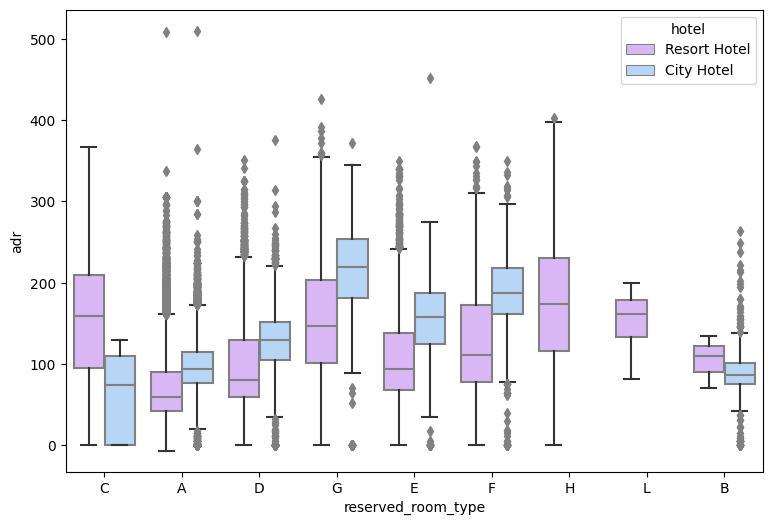

In [42]:
fig = plt.figure(figsize=(9,6), dpi=100)
sns.boxplot(
    data=data,
    x='reserved_room_type',
    y='adr',
    hue='hotel',
    palette=['#daadff', '#add5ff'],
    whiskerprops=dict(color='#333333'),   # Whiskers (error bars)
    capprops=dict(color='#333333')        # Caps at the end of whiskers
)



For city hotels, the highest ADR is seen for Room type ‘G’ and the lowest ADR for room type ‘C’. Detailed analysis and reasoning for the same are not possible due to the unavailability of abbreviations/ description for each of the room types. For Resort hotels, the highest ADR is seen for Room types ‘C’ and ‘H’ and type ‘A’ rooms have the lowest ADR.

C:\Users\ellie\Documents\Anaconda_Nucleus\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ellie\Documents\Anaconda_Nucleus\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


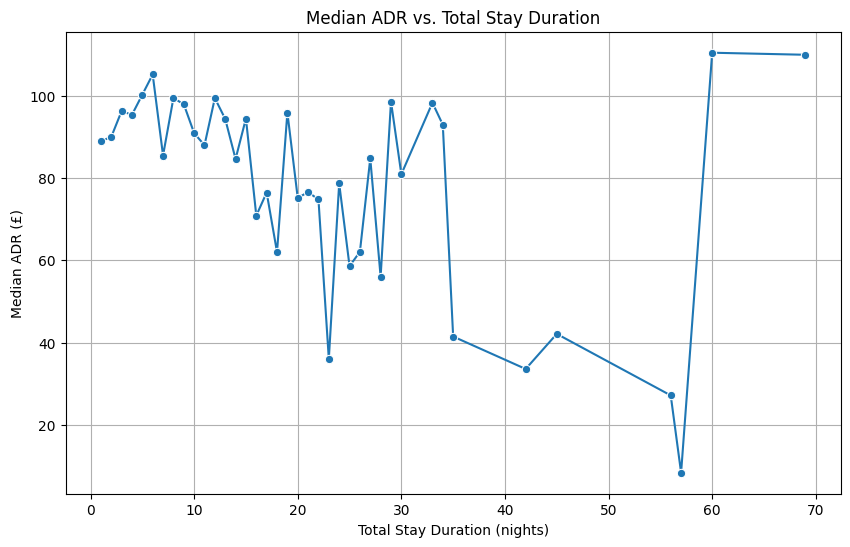

In [43]:
# 1. Remove rows with zero ADR
clean_df = df[df['adr'] > 1]

# 2. Remove outliers using IQR
Q1 = clean_df['adr'].quantile(0.25)
Q3 = clean_df['adr'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = clean_df[
    (clean_df['adr'] >= Q1 - 1.5 * IQR) &
    (clean_df['adr'] <= Q3 + 1.5 * IQR)
]

# 3. Aggregate median ADR by stay duration
grouped = filtered_df.groupby('total_stay_duration')['adr'].median().reset_index()

# 4. Visualize
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped, x='total_stay_duration', y='adr', marker='o')
plt.title('Median ADR vs. Total Stay Duration')
plt.xlabel('Total Stay Duration (nights)')
plt.ylabel('Median ADR (£)')
plt.grid(True)
plt.show()


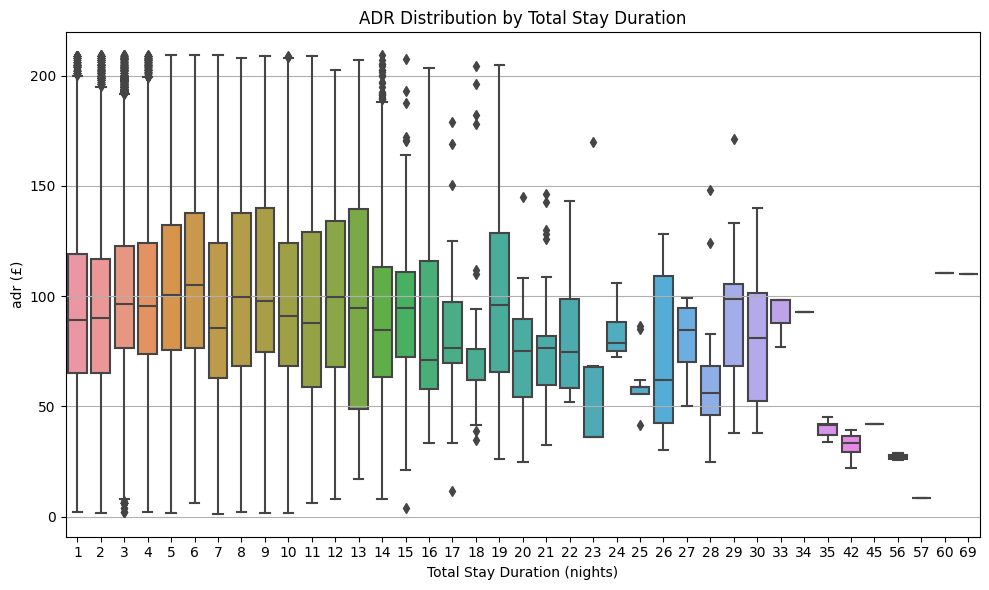

In [44]:
# Remove rows where adr is gt 1 (there is a single outlier with an ADR of £1!)
filtered = df[df['adr'] > 1]

# Remove outliers in adr using the IQR method
Q1 = filtered['adr'].quantile(0.25)
Q3 = filtered['adr'].quantile(0.75)
IQR = Q3 - Q1
filtered = filtered[
    (filtered['adr'] >= Q1 - 1.5 * IQR) &
    (filtered['adr'] <= Q3 + 1.5 * IQR)
]

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered,
    x='total_stay_duration',
    y='adr'
)
plt.title('ADR Distribution by Total Stay Duration')
plt.xlabel('Total Stay Duration (nights)')
plt.ylabel('adr (£)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

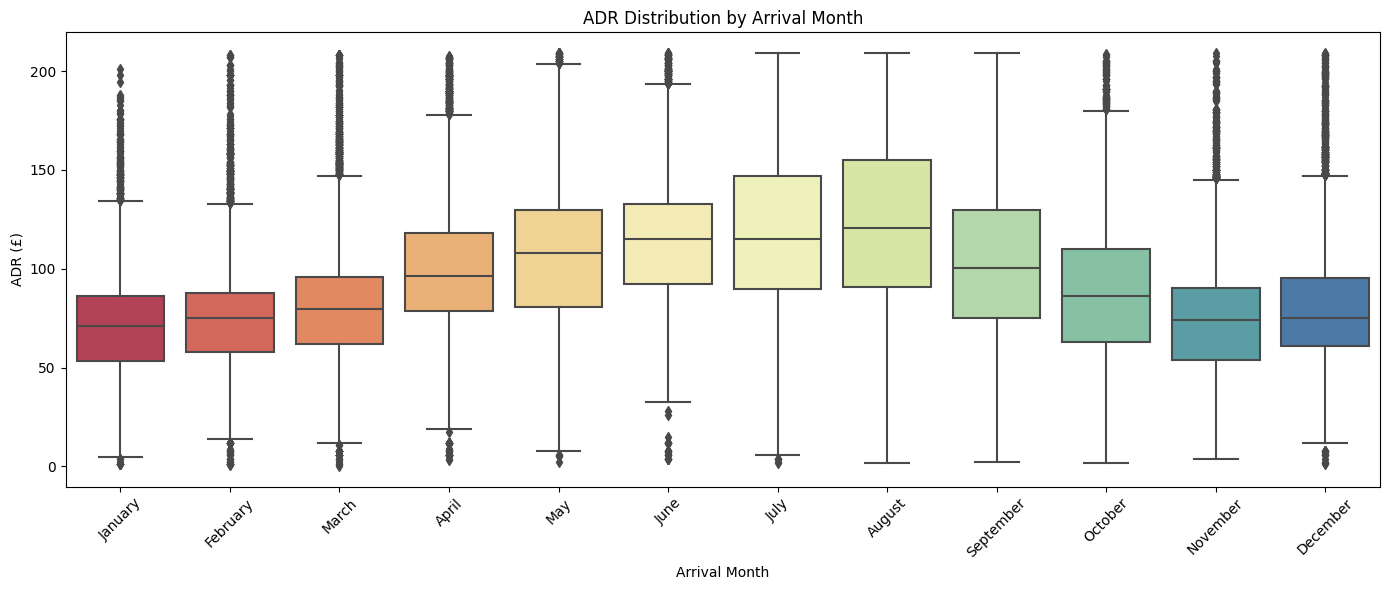

In [45]:
# Map arrival_date_month number to month name
df['arrival_date_month_name'] = df['arrival_date_month'].apply(lambda x: calendar.month_name[int(x)])

# Remove rows with adr of 0
filtered = df[df['adr'] > 0]

# Remove outliers using IQR
Q1 = filtered['adr'].quantile(0.25)
Q3 = filtered['adr'].quantile(0.75)
IQR = Q3 - Q1
filtered = filtered[
    (filtered['adr'] >= Q1 - 1.5 * IQR) &
    (filtered['adr'] <= Q3 + 1.5 * IQR)
]

# month order for plotting
month_order = list(calendar.month_name)[1:]  # Excludes empty string at index 0

# Boxplot - Dist of adr by arrival month
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=filtered,
    x='arrival_date_month_name',
    y='adr',
    order=month_order,
    palette='Spectral')
plt.title('ADR Distribution by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('ADR (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()